Original time series:


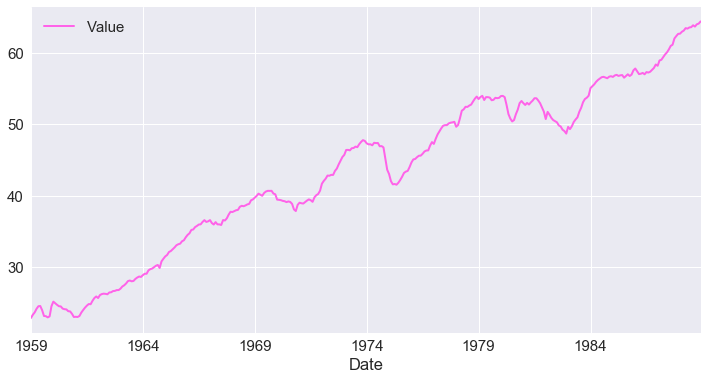


Stationarity check for original time series :



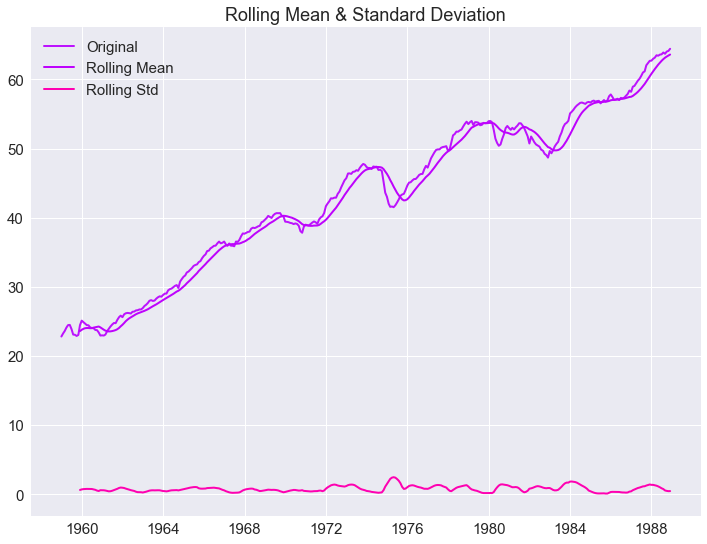


Results of Dickey-Fuller Test:
Test Statistic                  -0.253391
p-value                          0.931851
#Lags Used                       5.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64
Есть единичные корни, ряд не стационарен


Additive model:


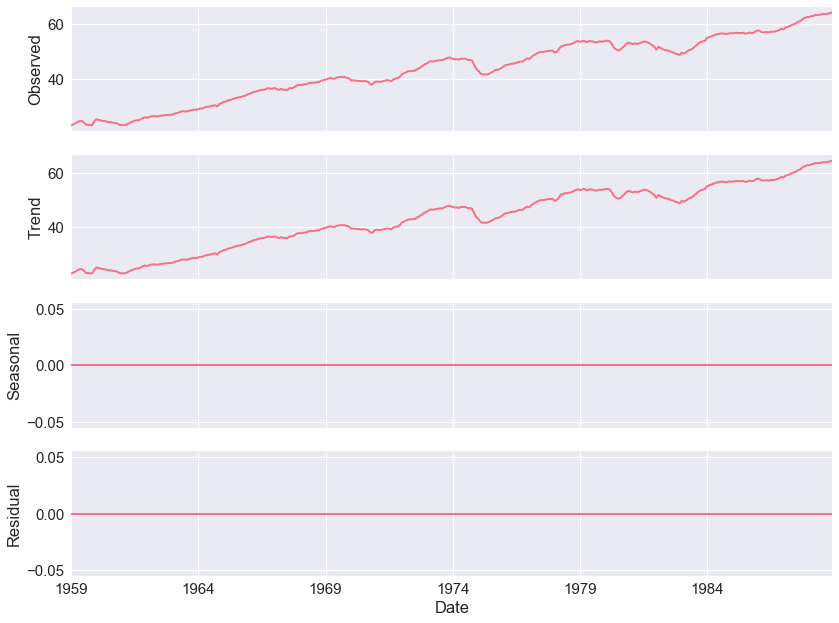


Stationarity check for trend :



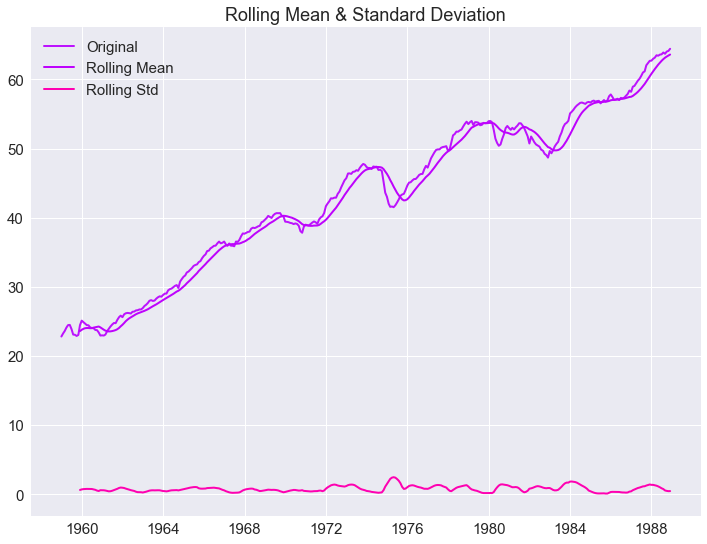


Results of Dickey-Fuller Test:
Test Statistic                  -0.253391
p-value                          0.931851
#Lags Used                       5.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64
Есть единичные корни, ряд не стационарен

Stationarity check for seasonal :



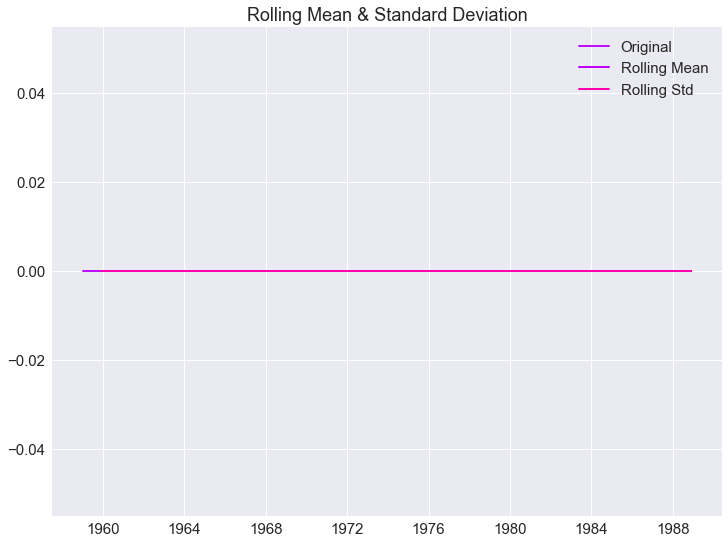


Results of Dickey-Fuller Test:
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    359.000000
Critical Value (1%)             -3.448697
Critical Value (5%)             -2.869625
Critical Value (10%)            -2.571077
dtype: float64
Единичных корней нет, ряд стационарен

Stationarity check for resid :



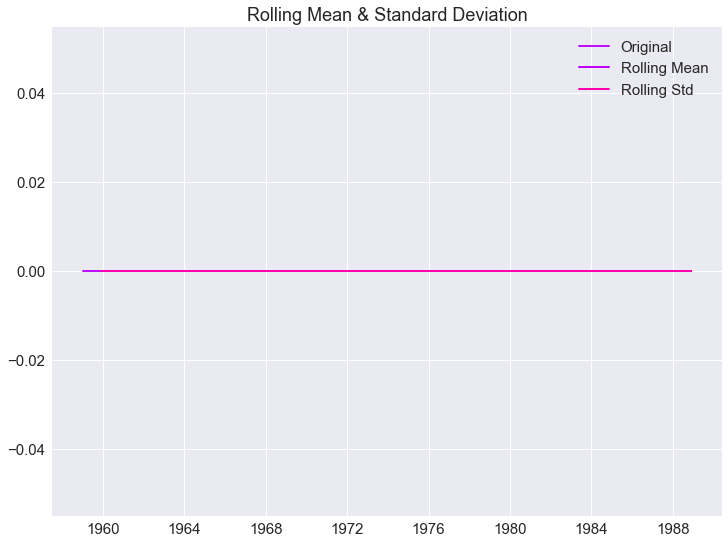


Results of Dickey-Fuller Test:
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    359.000000
Critical Value (1%)             -3.448697
Critical Value (5%)             -2.869625
Critical Value (10%)            -2.571077
dtype: float64
Единичных корней нет, ряд стационарен


Multiplicative model:


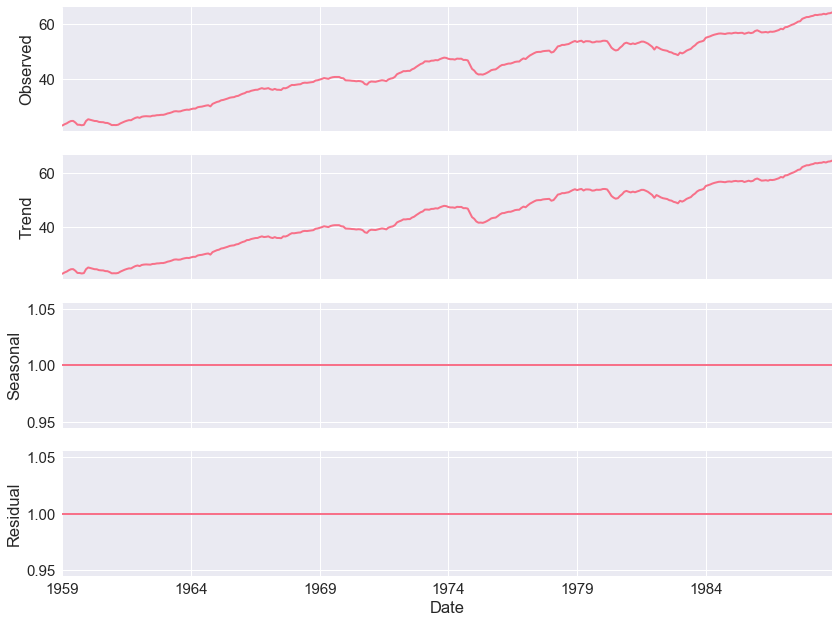


Stationarity check for trend :



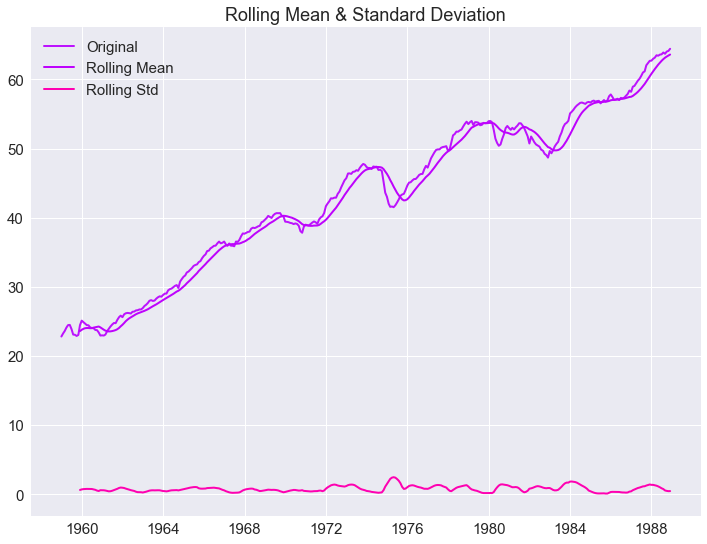


Results of Dickey-Fuller Test:
Test Statistic                  -0.253391
p-value                          0.931851
#Lags Used                       5.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64
Есть единичные корни, ряд не стационарен

Stationarity check for seasonal :



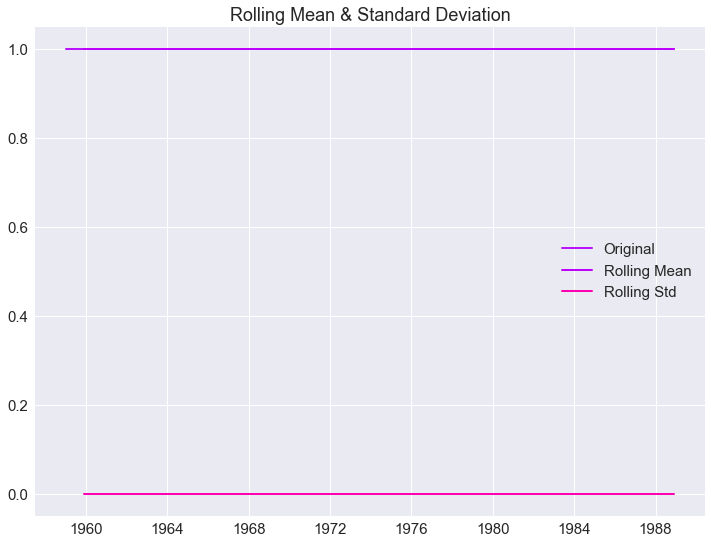


Results of Dickey-Fuller Test:
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    359.000000
Critical Value (1%)             -3.448697
Critical Value (5%)             -2.869625
Critical Value (10%)            -2.571077
dtype: float64
Единичных корней нет, ряд стационарен

Stationarity check for resid :



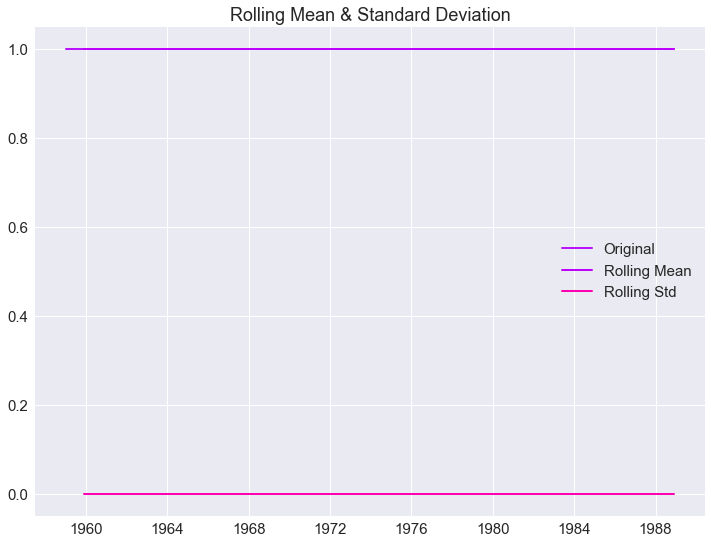


Results of Dickey-Fuller Test:
Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    359.000000
Critical Value (1%)             -3.448697
Critical Value (5%)             -2.869625
Critical Value (10%)            -2.571077
dtype: float64
Единичных корней нет, ряд стационарен
Ряд является интегрированным порядка  1


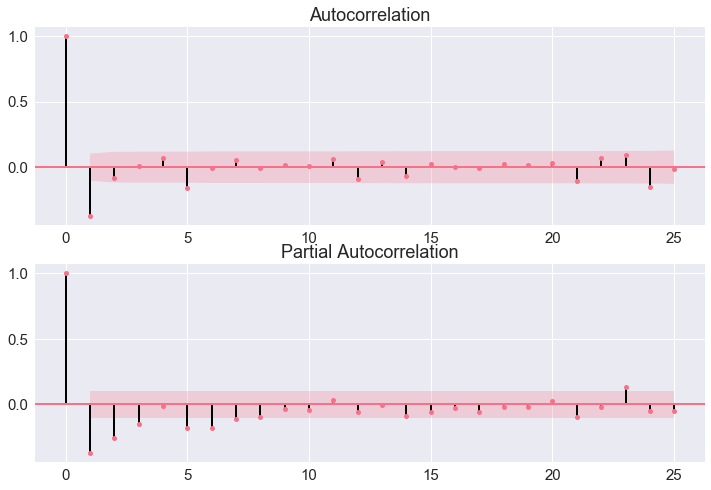

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Thu, 07 Dec 2017   AIC                            248.734
Time:                        23:59:07   BIC                            264.267
Sample:                    02-01-1959   HQIC                           254.911
                         - 12-01-1988                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     

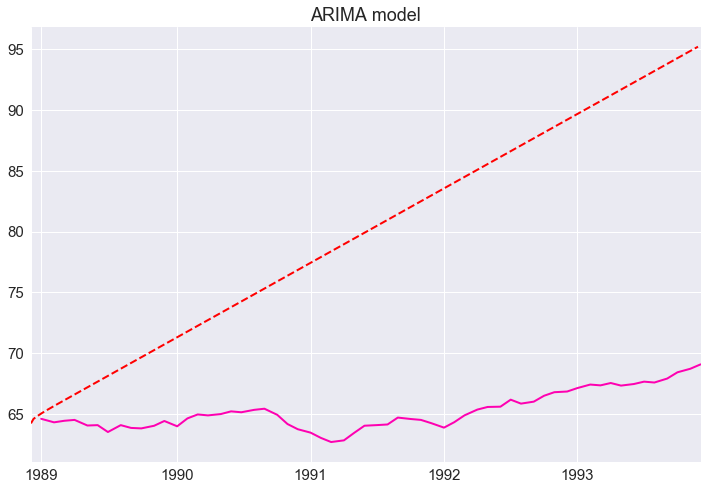

R2 =  -289.164486043 
AIC: 248.73365724475116
                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  360
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -120.678
Date:                Thu, 07 Dec 2017   AIC                            251.356
Time:                        23:59:09   BIC                            270.787
Sample:                    01-01-1959   HQIC                           259.082
                         - 12-01-1988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0475      0.031      1.520      0.129      -0.014       0.109
drift      -1.375e-05      0.000     -0.100      0.921      -0.000       0.000
ar.L1 

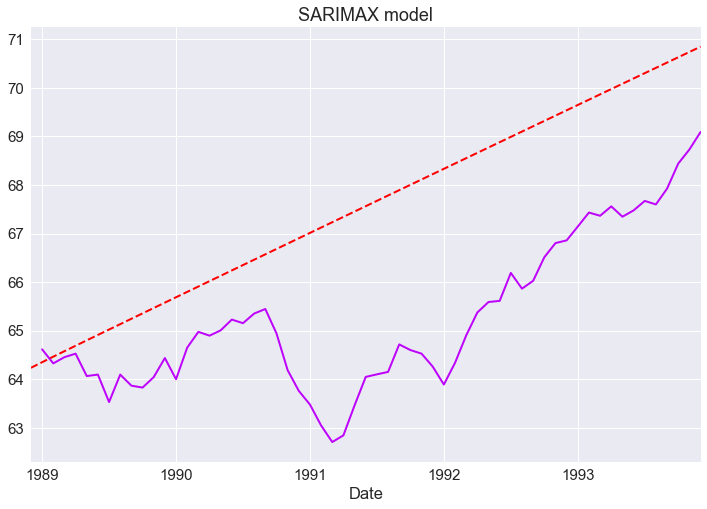

R2 =  -1.90719191824 
AIC: 251.356381346


In [158]:
import csv
import pandas as pd
from pandas import read_csv, DataFrame
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 12, 9
np.seterr(divide='ignore', invalid='ignore')
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set_palette("husl")

dataset = read_csv('training.csv', ',', parse_dates=['Date'],
                   index_col=['Date'], dayfirst=True)
otg = dataset.Value


def test_stationarity(timeseries, str="original time series"):
    print("\nStationarity check for", str, ":\n")
    # Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=12, center=False).mean()
    rolstd = pd.Series.rolling(timeseries, window=12, center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, sns.xkcd_rgb["neon purple"], label='Original')
    mean = plt.plot(rolmean, sns.xkcd_rgb["bright purple"],
                    label='Rolling Mean')
    std = plt.plot(rolstd, sns.xkcd_rgb["bright pink"], label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Perform Dickey-Fuller test:
    print('\nResults of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                             '#Lags Used', 
                                             'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[0] > dftest[4]['5%']:
        print('Есть единичные корни, ряд не стационарен')
    else:
        print('Единичных корней нет, ряд стационарен')
print("Original time series:")
otg.plot(figsize=(12, 6), color=sns.xkcd_rgb["candy pink"])
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

test_stationarity(otg)

print("\n\nAdditive model:")
result = seasonal_decompose(otg, model='additive', freq=1)
result.plot()
plt.show()
test_stationarity(result.trend, "trend")
test_stationarity(result.seasonal, "seasonal")
test_stationarity(result.resid, "resid")

print("\n\nMultiplicative model:")
result = seasonal_decompose(otg, model='multiplicative', freq=1)
result.plot()
plt.show()
test_stationarity(result.trend, "trend")
test_stationarity(result.seasonal, "seasonal")
test_stationarity(result.resid, "resid")

i = 1
dftest = adfuller(otg, autolag='AIC')
if dftest[0] > dftest[4]['5%']:
    otg1diff = otg.diff(periods=1).dropna()
else:
    i = 0
k = 0
while i == 1:
    dftest = adfuller(otg1diff, autolag='AIC')
    if dftest[0] <= dftest[4]['5%']:
        i = 0
    otg1diff = otg1diff.diff(periods=1).dropna()
    k = k + 1

if k:
    print("Ряд является интегрированным порядка ", k)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=25, ax=ax2)
plt.show()

dataset1 = read_csv('testing.csv', ',', parse_dates=['Date'],
                    index_col=['Date'], dayfirst=True)
otg1 = dataset1.Value

# ARIMA model
model_ARIMA = sm.tsa.ARIMA(otg, order=(1, 1, 1), freq='W').fit()
print(model_ARIMA.summary())
result = model_ARIMA.predict('1988-12-01', '1993-12-01', typ='levels')
r2 = r2_score(otg1, result['1992-10-10':])
otg1.plot(figsize=(12, 8), color=sns.xkcd_rgb['bright pink'])
result.plot(style='r--')
plt.title("ARIMA model")
plt.show()
print("R2: ", r2, "\nAIC:", model_ARIMA.aic)

# SARIMAX model
model_SARIMAX = sm.tsa.statespace.SARIMAX(otg, order=(1, 1, 1),
                                          trend='ct').fit()
result = model_SARIMAX.predict(start='1988-12-01', end='1993-12-01',
                               dynamic=True, simple_differencing=True)
print(model_SARIMAX.summary())
r2 = r2_score(otg1, result['1989-01-01':])
result.plot(figsize=(12, 8), style='r--')
otg1.plot(figsize=(12, 8), color=sns.xkcd_rgb['bright purple'])
plt.title("SARIMAX model")
plt.show()
print("R2: ", r2, "\nAIC:", model_SARIMAX.aic)

    